
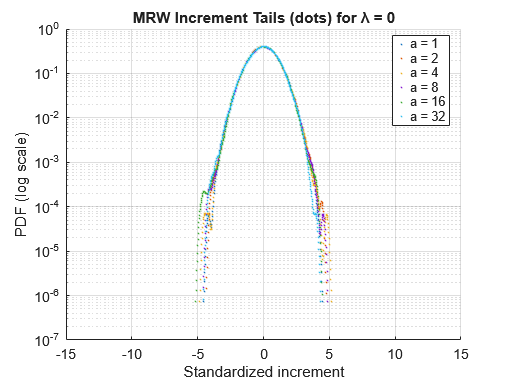


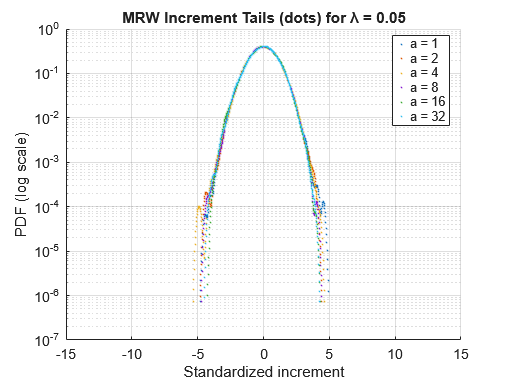

In [1]:
function [X, omega] = mrw_fft(N, lambda)
% MRW_FFT  Fast Multifractal Random Walk generator (Bacry–Delour–Muzy)
%
%   N       - length of the signal
%   lambda  - intermittency parameter (typical: 0.05–0.2)

    % Frequency grid
    k = [0:N/2, -N/2+1:-1]';
    k_abs = abs(k);
    k_abs(1) = 1;  % avoid division by zero

    % Power spectrum of log‑correlated field: S(k) ~ 1/|k|
    Sk = 1 ./ k_abs;

    % Random phases
    xi = randn(N,1) + 1i*randn(N,1);

    % Fourier domain field
    Wk = sqrt(Sk) .* xi;

    % Inverse FFT → log‑correlated Gaussian field
    omega = real(ifft(Wk));

    % Normalize variance to lambda^2
    omega = lambda * omega / std(omega);

    % Center
    omega = omega - mean(omega);

    % MRW increments
    eps = randn(N,1);
    dX = eps .* exp(omega);

    % Integrate
    X = cumsum(dX);
end

%% ---------------------------------------------------------
% PARAMETERS
%% ---------------------------------------------------------
lambdas = [0, 0.05, 0.2, 0.4];
N = 50000;

% Scales for coarse-grained increments
scales = [1, 2, 4, 8, 16, 32];

% Colors for different scales
colors = lines(numel(scales));

%% ---------------------------------------------------------
% LOOP OVER LAMBDAS — ONE FIGURE PER λ
%% ---------------------------------------------------------

for li = 1:numel(lambdas)

    L = lambdas(li);

    % Generate MRW
    [X, ~] = mrw_fft(N, L);

    figure; hold on;

    for si = 1:numel(scales)
        a = scales(si);

        % Coarse-grained increments: X(t+a) - X(t)
        dXa = X(1+a:end) - X(1:end-a);

        % Standardize
        dXa = (dXa - mean(dXa)) / std(dXa);

        % Estimate PDF using kernel density
        [pdf_vals, x_vals] = ksdensity(dXa, 'NumPoints', 400);

        % Plot as dots
        plot(x_vals, pdf_vals, '.', ...
            'Color', colors(si,:), ...
            'MarkerSize', 2, ...
            'DisplayName', "a = " + string(a));
    end

    set(gca,'YScale','log')
    xlabel("Standardized increment")
    xlim([-15 15])
    ylabel("PDF (log scale)")
    title("MRW Increment Tails (dots) for λ = " + string(L))
    legend("Location","best")
    grid on
end

<center>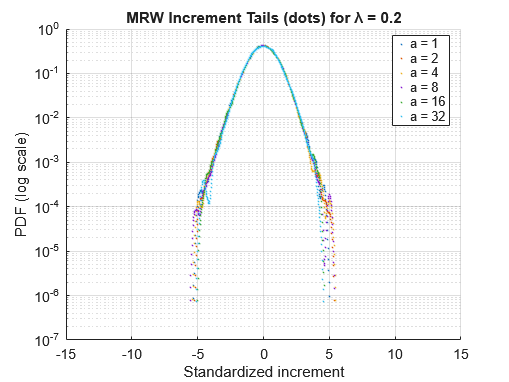</center>


<center>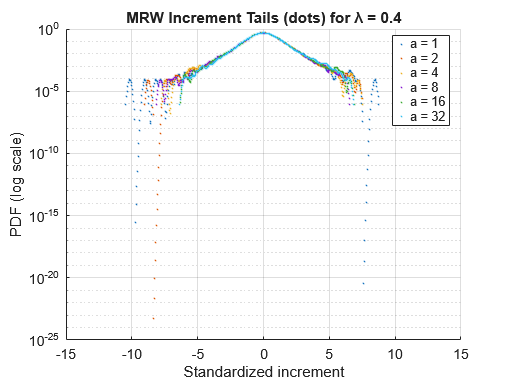</center>

